<a href="https://colab.research.google.com/github/geantrindade/ConvNet-Performance-Prediction/blob/master/notebooks/dataset_meta_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [3]:
!pip install -U pymfe

from pymfe.mfe import MFE
import datetime

import numpy as np
from numpy import savez_compressed
from numpy import load

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

import pandas as pd
import matplotlib.pyplot as plt

Requirement already up-to-date: pymfe in /usr/local/lib/python3.6/dist-packages (0.2.0)


# **Load and pre-process data**

---



In [0]:
def get_data_loaders(train_batch_size, test_batch_size):
    mnist = MNIST(download=True, train=True, root=".").data.float()
    
    data_transform = Compose([ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])
    #data_transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

    train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=False),
                            batch_size=test_batch_size, shuffle=False)
    
    return train_loader, test_loader

In [0]:
train_loader, test_loader = get_data_loaders(60000, 10000)

mnist_batch_train = next(iter(train_loader))
mnist_batch_test = next(iter(test_loader))

whole_mnist_X = torch.cat((mnist_batch_train[0], mnist_batch_test[0]), 0) 
whole_mnist_Y = torch.cat((mnist_batch_train[1], mnist_batch_test[1]), 0)

In [0]:
np_mnist_batch_train_X = mnist_batch_train[0].numpy()
np_mnist_batch_train_Y = mnist_batch_train[1].numpy()

np_mnist_batch_test_X = mnist_batch_test[0].numpy()
np_mnist_batch_test_Y = mnist_batch_test[1].numpy()

np_whole_mnist_X = whole_mnist_X.numpy()
np_whole_mnist_Y = whole_mnist_Y.numpy() 

In [0]:
#flat pixels

np_mnist_batch_train_X = np_mnist_batch_train_X.reshape((np_mnist_batch_train_X.shape[0], np_mnist_batch_train_X.shape[2] * np_mnist_batch_train_X.shape[3]))
np_mnist_batch_test_X = np_mnist_batch_test_X.reshape((np_mnist_batch_test_X.shape[0], np_mnist_batch_test_X.shape[2] * np_mnist_batch_test_X.shape[3]))

np_whole_mnist_X = np_whole_mnist_X.reshape((np_whole_mnist_X.shape[0], np_whole_mnist_X.shape[2] * np_whole_mnist_X.shape[3]))

# **Meta-Feature extraction**

In [0]:
def extract_meta_features(pymfe_obj, X_data, Y_data) -> tuple:
  pymfe_obj.fit(X_data, Y_data)
  
  begin_t = datetime.datetime.now()
  meta_features = pymfe_obj.extract()
  end_t = datetime.datetime.now()

  print("\n\nmeta-extraction total time: ", end_t - begin_t, "\n")

  return meta_features

def print_meta_features(meta_features : tuple):
  print("\n".join("{:30} {:30} {:30}".format(x, y, z) for x, y, z in zip(meta_features[0], meta_features[1], meta_features[2])))
  print("\nnumber of meta-features: ", len(meta_features[0]))

In [0]:
meta_features_sets = []

## Version 1

In [0]:
mfe = MFE(features=["attr_ent", "attr_to_inst","can_cor", "class_conc", "class_ent", "cov", "eigenvalues", "eq_num_attr", "freq_class", "gravity", "inst_to_attr", 
                    "iq_range" , "joint_ent", "kurtosis", "mad", "max", "mean", "median", "min", "mut_inf", "nr_attr", "nr_bin", "nr_class", "nr_cor_attr", 
                    "nr_disc", "nr_inst", "nr_norm", "nr_num", "nr_outliers", "ns_ratio", "range", "sd", "skewness", "sparsity", "t_mean", "var", "w_lambda"],
          summary=["mean", "sd"], 
          measure_time="total")

In [28]:
#train
mft_train_v1 = extract_meta_features(mfe, np_mnist_batch_train_X, np_mnist_batch_train_Y)
print_meta_features(mft_train_v1)

meta-extraction total time:  0:00:23.193936
attr_ent.mean                              1.1245976686477661         1.6689300537109375e-06
attr_ent.sd                                1.3028632402420044         1.6689300537109375e-06
attr_to_inst                             0.013066666666666667         4.5299530029296875e-06
can_cor.mean                               0.7489992380142212         2.6226043701171875e-06
can_cor.sd                                0.12331559509038925         2.6226043701171875e-06
class_conc.mean                           0.10027358680963516              13.22898554801941
class_conc.sd                             0.13091528415679932              13.22898554801941
class_ent                                  3.3198709267551885         1.6689300537109375e-06
cov.mean                                  0.04092341661453247            0.00680088996887207
cov.sd                                    0.11500980705022812            0.00680088996887207
eigenvalues.mean          

In [29]:
#test
mft_test_v1 = extract_meta_features(mfe, np_mnist_batch_test_X, np_mnist_batch_test_Y)
print_meta_features(mft_test_v1)

meta-extraction total time:  0:00:13.319143
attr_ent.mean                               1.005646824836731          1.430511474609375e-06
attr_ent.sd                                1.1747077703475952          1.430511474609375e-06
attr_to_inst                                           0.0784         4.5299530029296875e-06
can_cor.mean                               0.7751142382621765         2.1457672119140625e-06
can_cor.sd                                0.10916385054588318         2.1457672119140625e-06
class_conc.mean                           0.13889558613300323             10.103055477142334
class_conc.sd                              0.1588108390569687             10.103055477142334
class_ent                                  3.3194225261208263          2.384185791015625e-06
cov.mean                                  0.04187243804335594           0.006768703460693359
cov.sd                                    0.11806239932775497           0.006768703460693359
eigenvalues.mean          

In [30]:
#whole
mft_whole_v1 = extract_meta_features(mfe, np_whole_mnist_X, np_whole_mnist_Y)
print_meta_features(mft_whole_v1)

meta-extraction total time:  0:00:26.608975
attr_ent.mean                               1.133476972579956          2.384185791015625e-06
attr_ent.sd                                 1.313546895980835          2.384185791015625e-06
attr_to_inst                                           0.0112         5.0067901611328125e-06
can_cor.mean                               0.7492933869361877         1.2159347534179688e-05
can_cor.sd                                0.12286309152841568         1.2159347534179688e-05
class_conc.mean                           0.09878312051296234             14.703420877456665
class_conc.sd                             0.12949182093143463             14.703420877456665
class_ent                                   3.319837025403414         2.1457672119140625e-06
cov.mean                                 0.041016411036252975            0.00693964958190918
cov.sd                                    0.11539138853549957            0.00693964958190918
eigenvalues.mean          

In [0]:
meta_features_sets.append((mft_train_v1, mft_test_v1, mft_whole_v1))

## Version 2

In [0]:
mfe = MFE(features=["attr_ent", "attr_to_inst","can_cor", "class_conc", "class_ent", "cov", "eigenvalues", "eq_num_attr", "freq_class", "gravity", "inst_to_attr", 
                    "iq_range" , "joint_ent", "kurtosis", "mad", "max", "mean", "median", "min", "mut_inf", "nr_attr", "nr_bin", "nr_class", "nr_cor_attr", 
                    "nr_disc", "nr_inst", "nr_norm", "nr_num", "nr_outliers", "ns_ratio", "range", "sd", "skewness", "sparsity", "t_mean", "var", "w_lambda"],
          summary=["mean"], 
          measure_time="total")

In [33]:
#train
mft_train_v2 = extract_meta_features(mfe, np_mnist_batch_train_X, np_mnist_batch_train_Y)
print_meta_features(mft_train_v2)

meta-extraction total time:  0:00:24.332636
attr_ent.mean                              1.1245976686477661          2.384185791015625e-06
attr_to_inst                             0.013066666666666667            5.7220458984375e-06
can_cor.mean                               0.7489992380142212         2.1457672119140625e-06
class_conc.mean                           0.10027358680963516             14.494219541549683
class_ent                                  3.3198709267551885         2.6226043701171875e-06
cov.mean                                  0.04092341661453247           0.006888866424560547
eigenvalues.mean                           0.7084394097328186            0.35032057762145996
eq_num_attr                                 34.00769883499537          1.621246337890625e-05
freq_class.mean                           0.10000000149011612         1.0728836059570312e-05
gravity                                      15.6823148727417            0.07611894607543945
inst_to_attr              

In [34]:
#test
mft_test_v2 = extract_meta_features(mfe, np_mnist_batch_test_X, np_mnist_batch_test_Y)
print_meta_features(mft_test_v2)

meta-extraction total time:  0:00:13.387880
attr_ent.mean                               1.005646824836731            1.9073486328125e-06
attr_to_inst                                           0.0784             3.814697265625e-06
can_cor.mean                               0.7751142382621765         2.1457672119140625e-06
class_conc.mean                           0.13889558613300323             10.659376382827759
class_ent                                  3.3194225261208263         2.1457672119140625e-06
cov.mean                                  0.04187243804335594           0.006777524948120117
eigenvalues.mean                           0.7101541757583618             0.3609018325805664
eq_num_attr                                32.230174443668005         1.5497207641601562e-05
freq_class.mean                           0.10000000149011612         1.2159347534179688e-05
gravity                                    16.277509689331055           0.014150857925415039
inst_to_attr              

In [35]:
#whole
mft_whole_v2 = extract_meta_features(mfe, np_whole_mnist_X, np_whole_mnist_Y)
print_meta_features(mft_whole_v2)

meta-extraction total time:  0:00:26.425064
attr_ent.mean                               1.133476972579956         2.1457672119140625e-06
attr_to_inst                                           0.0112          5.245208740234375e-06
can_cor.mean                               0.7492933869361877         2.1457672119140625e-06
class_conc.mean                           0.09878312051296234             14.942391872406006
class_ent                                   3.319837025403414         2.1457672119140625e-06
cov.mean                                 0.041016411036252975          0.0071070194244384766
eigenvalues.mean                           0.7087536454200745            0.35759806632995605
eq_num_attr                                33.876050133048835         1.7404556274414062e-05
freq_class.mean                           0.09999999403953552         1.4543533325195312e-05
gravity                                    15.760612487792969            0.08436155319213867
inst_to_attr              

In [0]:
meta_features_sets.append((mft_train_v2, mft_test_v2, mft_whole_v2))

## Version 3

In [0]:
mfe = MFE(features=["attr_ent", "attr_to_inst","can_cor", "class_conc", "class_ent", "cov", "eigenvalues", "eq_num_attr", "freq_class", "gravity", "inst_to_attr", 
                    "iq_range" , "joint_ent", "kurtosis", "mad", "max", "mean", "median", "min", "mut_inf", "nr_attr", "nr_bin", "nr_class", "nr_cor_attr", 
                    "nr_disc", "nr_inst", "nr_norm", "nr_num", "nr_outliers", "ns_ratio", "range", "sd", "skewness", "sparsity", "t_mean", "var", "w_lambda"],
          summary=["max", "min", "median", "mean", "var", "sd", "kurtosis", "skewness"],
          measure_time="total")

In [38]:
#train
mft_train_v3 = extract_meta_features(mfe, np_mnist_batch_train_X, np_mnist_batch_train_Y)
print_meta_features(mft_train_v3)

meta-extraction total time:  0:00:28.335246
attr_ent.kurtosis                         -1.1219695647099106         2.6226043701171875e-05
attr_ent.max                                3.755220413208008         2.6226043701171875e-05
attr_ent.mean                              1.1245976686477661         2.6226043701171875e-05
attr_ent.median                            0.3673746883869171         2.6226043701171875e-05
attr_ent.min                                              0.0         2.6226043701171875e-05
attr_ent.sd                                1.3028632402420044         2.6226043701171875e-05
attr_ent.skewness                          0.7247737138293365         2.6226043701171875e-05
attr_ent.var                               1.6974526643753052         2.6226043701171875e-05
attr_to_inst                             0.013066666666666667         4.0531158447265625e-06
can_cor.kurtosis                          -1.5673614970210135          2.384185791015625e-06
can_cor.max               

In [39]:
#test
mft_test_v3 = extract_meta_features(mfe, np_mnist_batch_test_X, np_mnist_batch_test_Y)
print_meta_features(mft_test_v3)

meta-extraction total time:  0:00:16.836582
attr_ent.kurtosis                         -1.0955344707663608         1.6689300537109375e-06
attr_ent.max                               3.3531336784362793         1.6689300537109375e-06
attr_ent.mean                               1.005646824836731         1.6689300537109375e-06
attr_ent.median                            0.3026430606842041         1.6689300537109375e-06
attr_ent.min                                              0.0         1.6689300537109375e-06
attr_ent.sd                                1.1747077703475952         1.6689300537109375e-06
attr_ent.skewness                          0.7446827329822502         1.6689300537109375e-06
attr_ent.var                               1.3799383640289307         1.6689300537109375e-06
attr_to_inst                                           0.0784            5.7220458984375e-06
can_cor.kurtosis                          -1.5540625613688193         2.1457672119140625e-06
can_cor.max               

In [40]:
#whole
mft_whole_v3 = extract_meta_features(mfe, np_whole_mnist_X, np_whole_mnist_Y)
print_meta_features(mft_whole_v3)

meta-extraction total time:  0:00:29.781670
attr_ent.kurtosis                          -1.126077367419713            1.9073486328125e-06
attr_ent.max                                3.777414560317993            1.9073486328125e-06
attr_ent.mean                               1.133476972579956            1.9073486328125e-06
attr_ent.median                            0.3729779124259949            1.9073486328125e-06
attr_ent.min                                              0.0            1.9073486328125e-06
attr_ent.sd                                 1.313546895980835            1.9073486328125e-06
attr_ent.skewness                          0.7232800822894594            1.9073486328125e-06
attr_ent.var                               1.7254055738449097            1.9073486328125e-06
attr_to_inst                                           0.0112         5.4836273193359375e-06
can_cor.kurtosis                          -1.5643985393646889         2.6226043701171875e-06
can_cor.max               

In [0]:
meta_features_sets.append((mft_train_v3, mft_test_v3, mft_whole_v3))

# **DataFrame creation**

In [0]:
def print_meta_features_dict(mtf : dict):
  print("\nnumber of meta-features: ", len(mtf))
  print(mtf)

In [54]:
for idx_v, version in enumerate(meta_features_sets):
  for idx_p, partition in enumerate(version):
    meta_features_dict = {'dataset.name' : 'mnist'}
    
    for i in range(1, len(partition[0])):
      mtf_key, mtf_value = str(partition[0][i]), partition[1][i]
      meta_features_dict[mtf_key] = mtf_value

    df = pd.DataFrame(data=meta_features_dict, index=[0])
    #mnist_metafeatures_train_v1, mnist_metafeatures_test_v1, mnist_metafeatures_whole_v1, cifar_metafeatures_train_v1...
    csv_name = meta_features_dict.get('dataset.name') + "_metafeatures_" + ("train" if (idx_p == 0) else "test" if (idx_p == 1) else "whole") + "_v" + str(idx_v + 1)
    df.to_csv(csv_name + ".csv", index=False)

    print_meta_features_dict(meta_features_dict)


number of meta-features:  58
{'dataset.name': 'mnist', 'attr_ent.sd': 1.3028632, 'attr_to_inst': 0.013066666666666667, 'can_cor.mean': 0.74899924, 'can_cor.sd': 0.123315595, 'class_conc.mean': 0.10027359, 'class_conc.sd': 0.13091528, 'class_ent': 3.3198709267551885, 'cov.mean': 0.040923417, 'cov.sd': 0.11500981, 'eigenvalues.mean': 0.7084394, 'eigenvalues.sd': 3.5118978, 'eq_num_attr': 34.00769883499537, 'freq_class.mean': 0.1, 'freq_class.sd': 0.0056584203, 'gravity': 15.682315, 'inst_to_attr': 76.53061224489795, 'iq_range.mean': 0.7941754, 'iq_range.sd': 1.260328, 'joint_ent.mean': 4.346847, 'joint_ent.sd': 1.2154177, 'kurtosis.mean': 3925.1074, 'kurtosis.sd': 12093.466, 'mad.mean': 0.21012574, 'mad.sd': 0.55464107, 'max.mean': 2.3698385, 'max.sd': 1.034244, 'mean.mean': 5.459299e-05, 'mean.sd': 0.54031926, 'median.mean': -0.27016422, 'median.sd': 0.41897386, 'min.mean': -0.42401934, 'min.sd': 0.0, 'mut_inf.mean': 0.09762116, 'mut_inf.sd': 0.102586, 'nr_attr': 784, 'nr_bin': 17, 'nr

# **Debug**

In [0]:
print("train batch length: ", len(mnist_batch_train))
print("train batch X shape: ", mnist_batch_train[0].shape)
print("train batch X example: ", mnist_batch_train[0])
print("train batch Y shape: ", mnist_batch_train[1].shape)
print("train batch Y example: ", mnist_batch_train[1])

print("\ntest batch X length: ", len(mnist_batch_test))
print("test batch X shape: ", mnist_batch_test[0].shape)
print("test batch X example: ", mnist_batch_test[0])
print("test batch Y shape: ", mnist_batch_test[1].shape)
print("test batch Y example: ", mnist_batch_test[1])

print("\nwhole_mnist_X length: ", len(whole_mnist_X))
print("whole_mnist_X shape: ", whole_mnist_X[0].shape)
print("whole_mnist_X example: ", whole_mnist_X[0])
print("whole_mnist_Y length: ", len(whole_mnist_Y))
print("whole_mnist_Y shape: ", whole_mnist_Y[0].shape)
print("whole_mnist_Y example: ", whole_mnist_Y[0])

tensor(5)
(60000, 1, 28, 28)
(60000, 28, 28)


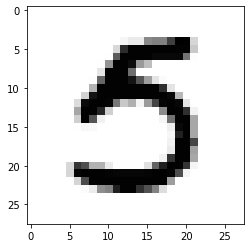

In [9]:
image_index = 0
print(mnist_batch_train[1][image_index]) #label

temp = mnist_batch_train[0].numpy()
print(temp.shape)
temp = temp.reshape((temp.shape[0], temp.shape[2], temp.shape[3]))
print(temp.shape)
plt.imshow(temp[image_index], cmap='Greys')



 tensor(5)
(1, 28, 28)
(1, 28, 28)


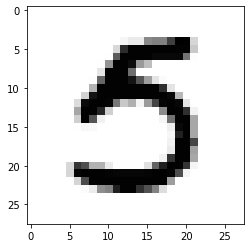

In [12]:
print(whole_mnist_Y[image_index]) #label
temp = whole_mnist_X[0].numpy()
print(temp.shape)
temp = temp.reshape((temp.shape[0], temp.shape[1], temp.shape[2]))
print(temp.shape)
plt.imshow(temp[image_index], cmap='Greys')

In [0]:
print("train batch length: ", len(np_mnist_batch_train_X))
print("train batch X shape: ", np_mnist_batch_train_X.shape)
print("train batch X example: ", np_mnist_batch_train_X[0])
print("train batch Y shape: ", np_mnist_batch_train_Y.shape)
print("train batch Y example: ", np_mnist_batch_train_Y[0])

print("\ntest batch X length: ", len(np_mnist_batch_test_X))
print("test batch X shape: ", np_mnist_batch_test_X.shape)
print("test batch X example: ", np_mnist_batch_test_X[0])
print("test batch Y shape: ", np_mnist_batch_test_Y.shape)
print("test batch Y example: ", np_mnist_batch_test_Y[0])

print("\nnp_whole_mnist_X length: ", len(np_whole_mnist_X))
print("np_whole_mnist_X shape: ", np_whole_mnist_X.shape)
print("np_whole_mnist_X example: ", np_whole_mnist_X[0])
print("np_whole_mnist_Y length: ", len(np_whole_mnist_Y))
print("np_whole_mnist_Y shape: ", np_whole_mnist_Y.shape)
print("np_whole_mnist_Y example: ", np_whole_mnist_Y[0])